<a href="https://colab.research.google.com/github/deep-son/Graduate-Admission/blob/master/Graduate_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

%matplotlib inline

In [ ]:
add_df = pd.read_csv("./Admission_Predict_Ver1.1.csv") 
add_df.head(10)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [ ]:
add_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [ ]:
add_df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [ ]:
add_df.drop(columns=['Serial No.'],inplace=True)

In [ ]:
add_df.rename(columns={'Chance of Admit ':'Chance of Admit','LOR ':'LOR'},inplace=True)
add_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78dfa6d3c8>,
      dtype=object)

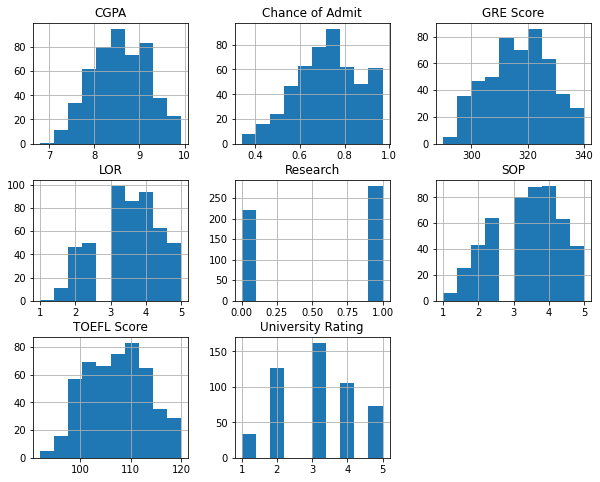

In [ ]:
add_df.hist(bins=10,figsize=(10,8))

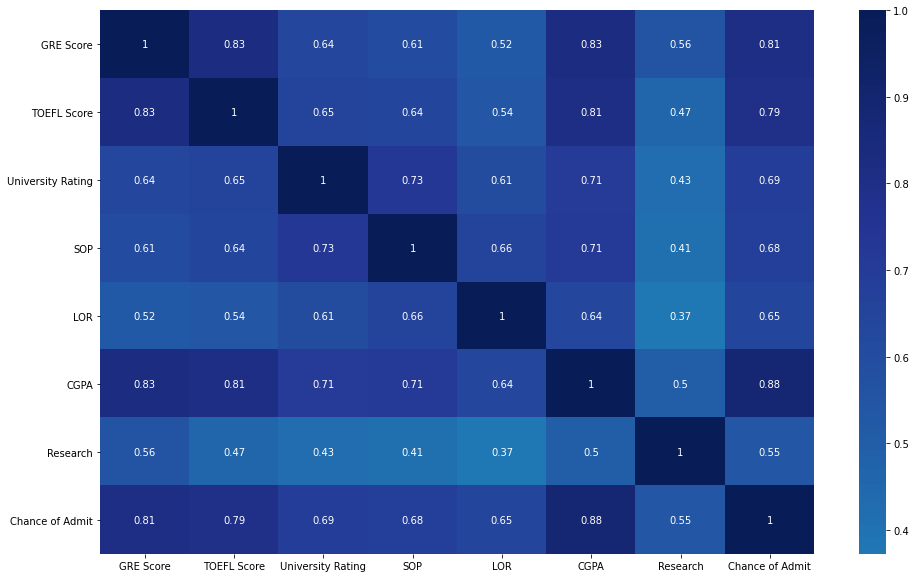

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(add_df.corr(),annot=True,center=0, cmap="YlGnBu")

### We can see all the columns have a strong positive corelation with output column

In [ ]:
add_df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

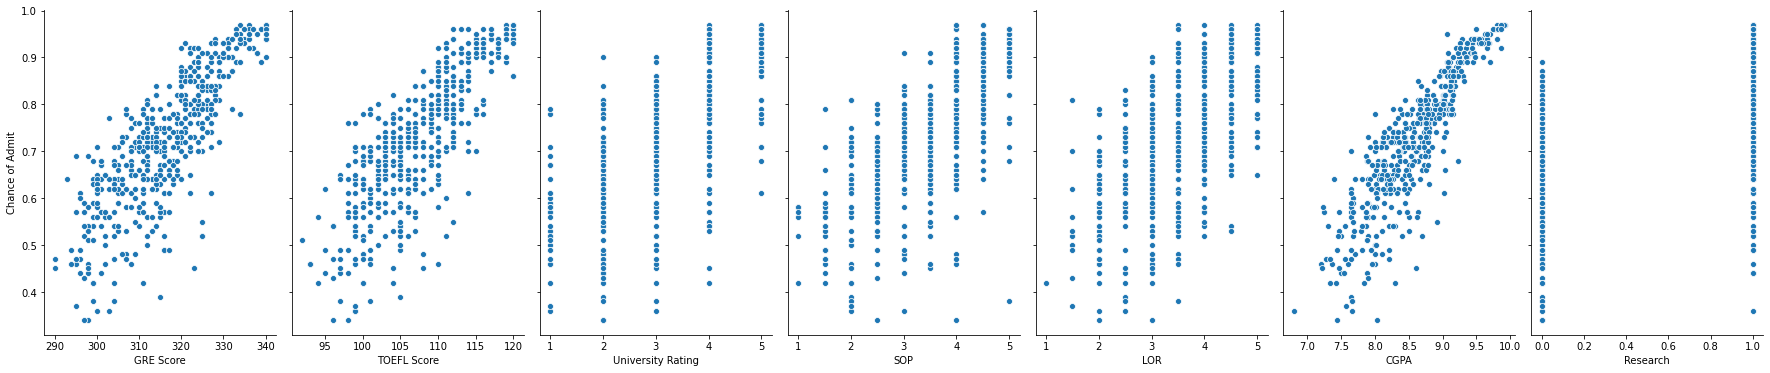

In [ ]:
sns.pairplot(add_df, x_vars=['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research'],y_vars=['Chance of Admit'],height=5, aspect=0.7)

In [ ]:
add_df1 = add_df.copy()
y = add_df1['Chance of Admit']
add_df1.drop(columns=['Chance of Admit'],inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(add_df1, y, test_size=0.2,random_state=1)

In [ ]:
#model without scaling

model1 = make_pipeline(linear_model.LinearRegression())
scores = cross_val_score(model1, X_train, y_train, cv=10)

model1.fit(X_train, y_train)
pred = model1.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))


print("MSE:{}  RMSE:{}".format(MSE,RMSE))

print("Trainig Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))




MSE:0.0034590988971363833  RMSE:0.058814104576507695
Trainig Accuracy: 79.99 (+/- 0.14)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78defedb70>,
      dtype=object)

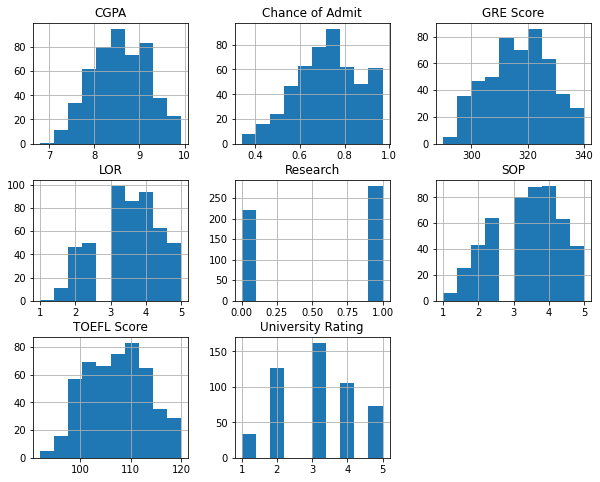

In [ ]:
add_df.hist(bins=10,figsize=(10,8))

In [ ]:
#scaling the data
add_df_norm = add_df.copy()
scaler = MinMaxScaler()
column_names_to_normalize = ['CGPA', 'GRE Score', 'LOR', 'SOP','TOEFL Score']
x = add_df_norm[column_names_to_normalize].values
x_scaled = scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = add_df_norm.index)
add_df_norm[column_names_to_normalize] = df_temp

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f78de179e10>,
      dtype=object)

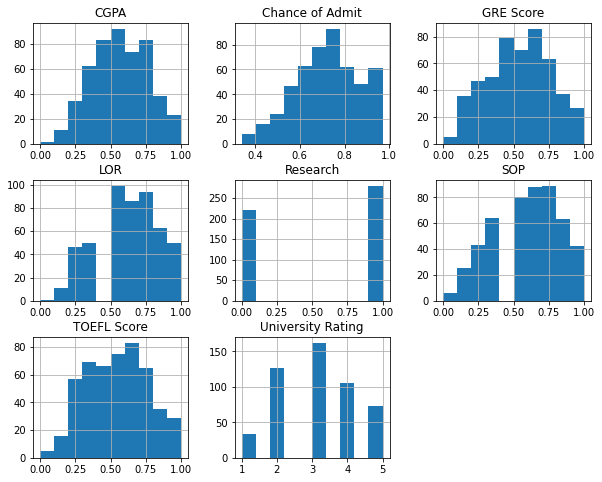

In [ ]:
add_df_norm.hist(bins=10,figsize=(10,8))

In [ ]:
y = add_df_norm['Chance of Admit']
add_df_norm.drop(columns=['Chance of Admit'],inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(add_df_norm, y, test_size=0.2,random_state=1)

In [ ]:
#model with scaling

model2 = make_pipeline(linear_model.LinearRegression())
scores = cross_val_score(model2, X_train, y_train, cv=10)

model2.fit(X_train, y_train)
pred = model2.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))


print("MSE:{}  RMSE:{}".format(MSE,RMSE))

print("Trainig Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

MSE:0.003459098897136384  RMSE:0.0588141045765077
Trainig Accuracy: 79.99 (+/- 0.14)


## Feature Engineering

In [ ]:
add_df.head(10)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
5,330,115,5,4.5,3.0,9.34,1,0.90
6,321,109,3,3.0,4.0,8.20,1,0.75
7,308,101,2,3.0,4.0,7.90,0,0.68
8,302,102,1,2.0,1.5,8.00,0,0.50
9,323,108,3,3.5,3.0,8.60,0,0.45


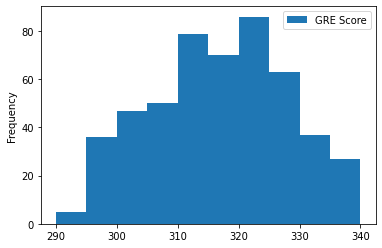

In [ ]:
add_df.plot(x='Chance of Admit', y='GRE Score',kind='hist')

In [ ]:
add_df['Research'].value_counts()

1    280
0    220
Name: Research, dtype: int64

,Chance of Admit
Research,
1,0.789964
0,0.634909


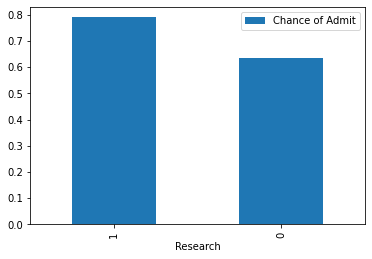

In [ ]:
add_df[['Research','Chance of Admit']].groupby(by='Research').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_df[['Research','Chance of Admit']].groupby(by='Research').mean().sort_values(by='Chance of Admit',ascending=False)

### Chance of getting an admit is higher with research experience

,Chance of Admit
University Rating,
5,0.888082
4,0.801619
3,0.702901
2,0.626111
1,0.562059


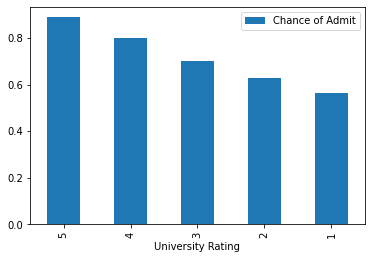

In [ ]:
add_df[['University Rating','Chance of Admit']].groupby(by='University Rating').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_df[['University Rating','Chance of Admit']].groupby(by='University Rating').mean().sort_values(by='Chance of Admit',ascending=False)

In [ ]:
add_dfnew = add_df.copy()

In [ ]:
add_dfnew['GT'] = add_dfnew['GRE Score'] + add_dfnew['TOEFL Score']
add_dfnew['LS'] = add_dfnew['LOR'] + add_dfnew['SOP']
add_dfnew['RR'] = add_dfnew['University Rating'] + add_dfnew['Research']

,Chance of Admit
RR,
6,0.908281
5,0.824615
4,0.725182
3,0.664911
2,0.612020
1,0.536250


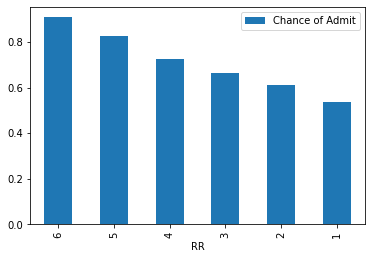

In [ ]:
add_dfnew[['RR','Chance of Admit']].groupby(by='RR').mean().sort_values(by='Chance of Admit',ascending=False).plot(kind='bar')
add_dfnew[['RR','Chance of Admit']].groupby(by='RR').mean().sort_values(by='Chance of Admit',ascending=False)

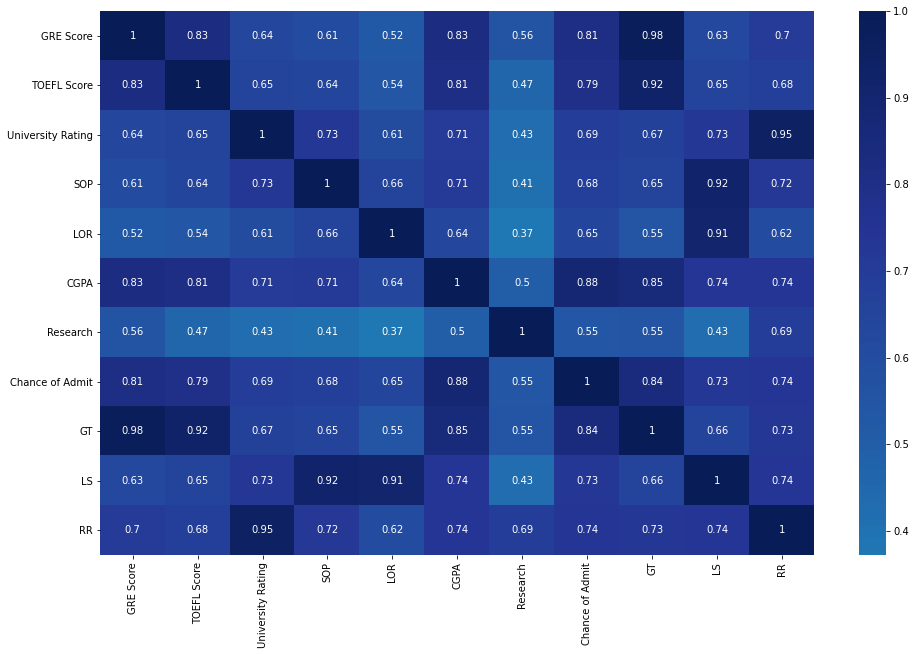

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(add_dfnew.corr(),annot=True,center=0, cmap="YlGnBu")

In [ ]:
add_df2 = add_dfnew.copy()

In [ ]:
y = add_df2['Chance of Admit']
add_df2.drop(columns=['Chance of Admit'],inplace=True)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(add_df2, y, test_size=0.2,random_state=1)

In [ ]:
#model with new features

model3 = make_pipeline(linear_model.LinearRegression())
scores = cross_val_score(model3, X_train, y_train, cv=10)

model3.fit(X_train, y_train)
pred = model3.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
Rsq = metrics.r2_score(y_test, pred)


print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))

print("Trainig Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

MSE:0.003461236117592874  RMSE:0.05883227105588288  R-Squared:0.8207634965774494
Trainig Accuracy: 79.97 (+/- 0.14)


In [ ]:
RF_reg = RandomForestRegressor()
params_RF = { "max_features": ['auto', 'sqrt', 'log2'], "n_estimators": [100,200,500,1000] , "min_samples_leaf": [1,20,50,100],"max_depth":[10,30,50]}
RF_GS = GridSearchCV(RF_reg, param_grid=params_RF, n_jobs=-1)
RF_GS.fit(X_train, y_train)
print(RF_GS.best_params_)


{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 200}


In [ ]:
model4 = make_pipeline(RandomForestRegressor(random_state=1, **RF_GS.best_params_,n_jobs=-1,oob_score=True))
scores = cross_val_score(model4, X_train, y_train, cv=10)

model4.fit(X_train, y_train)
pred = model4.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))

Rsq = metrics.r2_score(y_test, pred)


print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))

print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

MSE:0.004091008220449343  RMSE:0.06396098983325182  R-Squared:0.7881514048754936
Training Accuracy: 79.75 (+/- 0.15)


In [ ]:
model5 = make_pipeline(ExtraTreesRegressor())
scores = cross_val_score(model5, X_train, y_train, cv=10)

model5.fit(X_train, y_train)
pred = model5.predict(X_test)

MSE = metrics.mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
Rsq = metrics.r2_score(y_test, pred)


print("MSE:{}  RMSE:{}  R-Squared:{}".format(MSE,RMSE,Rsq))

print("Training Accuracy: %0.2f (+/- %0.2f)" % (scores.mean() *100, scores.std() * 2))

MSE:0.004580982400000003  RMSE:0.0676829550182319  R-Squared:0.762778602868831
Training Accuracy: 78.40 (+/- 0.17)
